In [1]:
using Plots, LaTeXStrings
theme(:bright)
default(linewidth=2, size=(300,200))

In [2]:
using SpecialFunctions

In [3]:
# Use the incomplete beta function as an example
# The function returns a tuple and we are only interested in the first value
p(θ) = beta_inc(5,5, θ)[1]

p (generic function with 1 method)

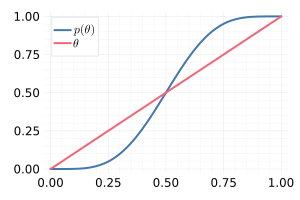

In [4]:
#| column: margin
#| label: fig-p-vs-theta
#| fig-cap: Example of $p$ such that there are multiple solutions to $p(θ) = θ$.
plt = plot(p, 0, 1, label=L"p(\theta)")
plot!(plt, θ->θ, 0, 1, label=L"\theta")

In [5]:
.

LoadError: syntax: invalid identifier name "."